# CSE437: Data Science

## Project

## Flood Prediction using Machine Learning

### Libraries

In [ ]:
# Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

### Data Exploration

In [ ]:
df = pd.read_csv("/content/Dataset - Flood Prediction.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.shape

(50000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

### Data Preprocessing

In [ ]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
df.duplicated().value_counts()

,count
False,50000


### Correlation Visualization

Correlation Matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


Correlation Heatmap

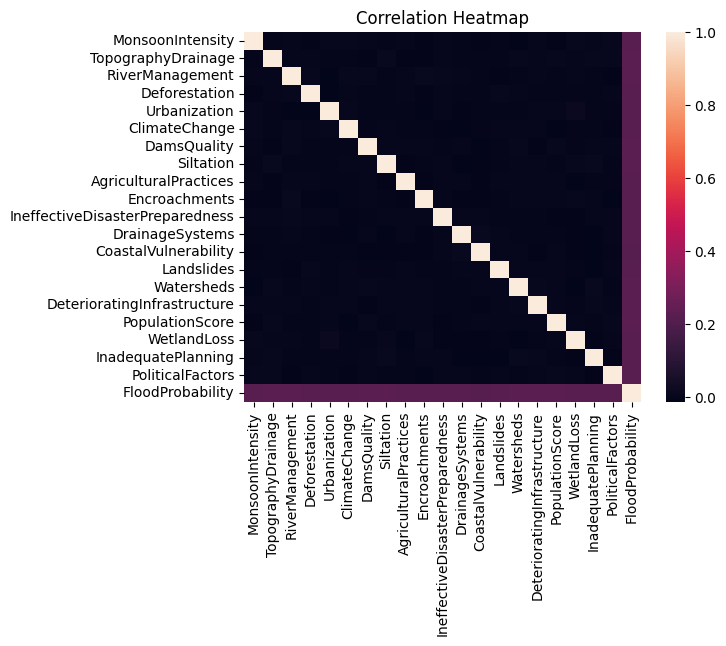

In [ ]:
sns.heatmap(corr_matrix, annot = False)
plt.title("Correlation Heatmap", fontsize = 12)
plt.show()

Correlation Coefficients

In [ ]:
corr_w_target = corr_matrix["FloodProbability"].drop("FloodProbability")
corr_w_target

,FloodProbability
MonsoonIntensity,0.224081
TopographyDrainage,0.229414
RiverManagement,0.228917
Deforestation,0.220237
Urbanization,0.220867
ClimateChange,0.220986
DamsQuality,0.227467
Siltation,0.226544
AgriculturalPractices,0.221846
Encroachments,0.218259


Correlation Coefficient Visualization

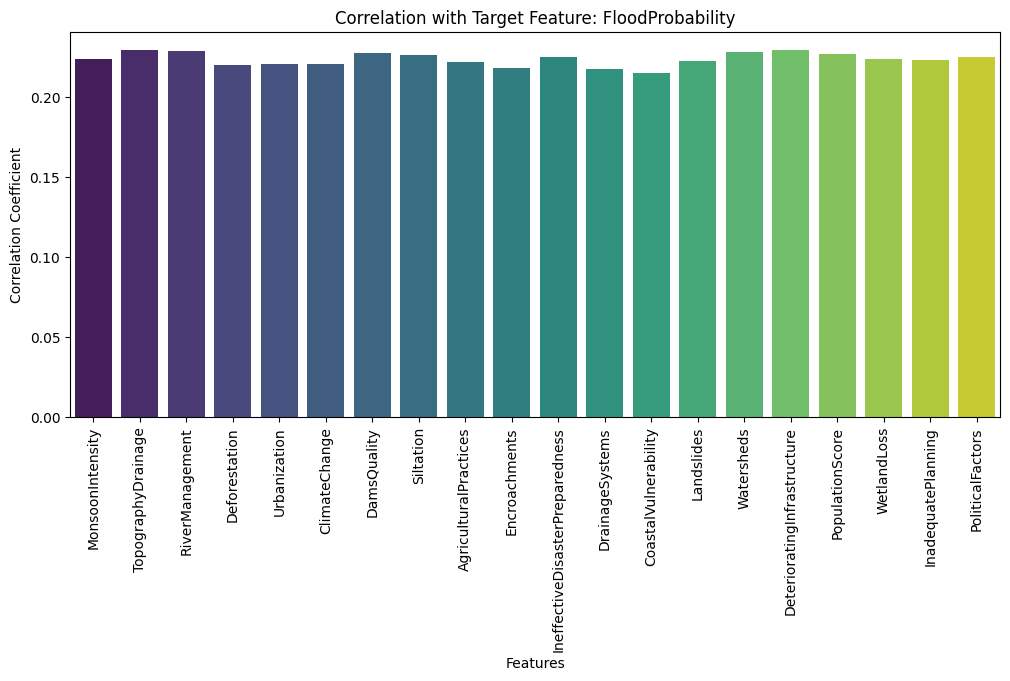

In [ ]:
corr_w_target = corr_w_target.squeeze()

plt.figure(figsize = (12, 5))
sns.barplot(x = corr_w_target.index, y = corr_w_target.values, hue = corr_w_target.index, palette = "viridis")
plt.xticks(rotation = 90)
plt.title('Correlation with Target Feature: FloodProbability')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

### Model Training and Testing

In [ ]:
x = df["FloodProbability"]

y = df.drop(["FloodProbability"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(y, x, test_size = 0.2, random_state = 1)

print(f"Training Set: x: {X_train.shape}, y: {y_train.shape}")
print(f"Testing Set: x: {X_test.shape}, y: {y_test.shape}")

Training Set: x: (40000, 20), y: (40000,)
Testing Set: x: (10000, 20), y: (10000,)


SVM

In [ ]:
model = svm.SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.020728753320087955
Root Mean Square Error: 0.02718026322978524
R-squared Score: 0.7090263654303338


Decision Tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.03731
Root Mean Square Error: 0.046980155385013364
R-squared Score: 0.13068891044611974


Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.020427970000000014
Root Mean Square Error: 0.026041112860244676
R-squared Score: 0.7329052192530687


KNN

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.018575400000000002
Root Mean Square Error: 0.023761902280751854
R-squared Score: 0.7776133395226715


### Probability Prediction Visualization

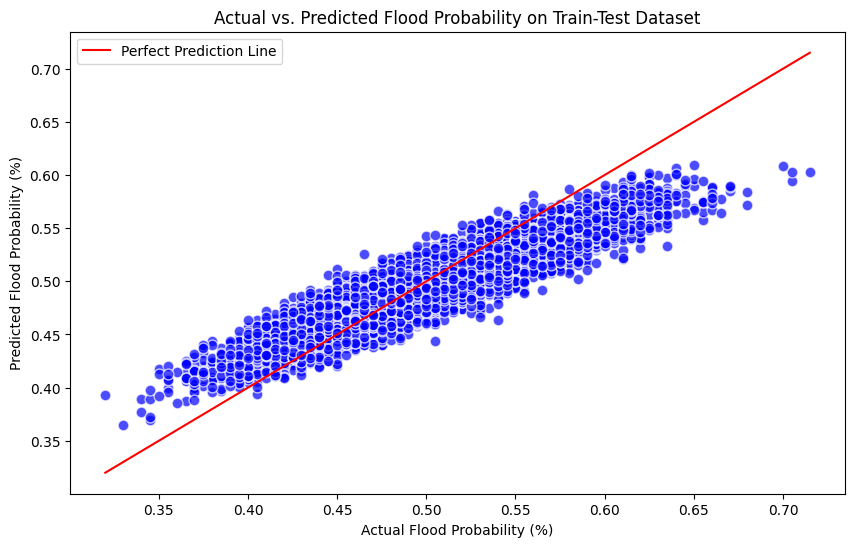

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = "blue", alpha = 0.7, edgecolors = "w", s = 60)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", label = "Perfect Prediction Line")
plt.xlabel("Actual Flood Probability (%)")
plt.ylabel("Predicted Flood Probability (%)")
plt.title("Actual vs. Predicted Flood Probability on Train-Test Dataset")
plt.legend()
plt.show()

### Model Performance Evaluation Summary

SVM
Mean Absolute Error: 0.0207
Root Mean Sqaure Error: 0.0272
R-squared Score: 0.7090

--------------------------------------------------

Decision Tree
Mean Absolute Error: 0.0372
Root Mean Sqaure Error: 0.0469
R-squared Score: 0.1346

--------------------------------------------------

Random Forest
Mean Absolute Error: 0.0205
Root Mean Sqaure Error: 0.0261
R-squared Score: 0.7315

--------------------------------------------------

KNN
Mean Absolute Error: 0.0186
Root Mean Sqaure Error: 0.0238
R-squared Score: 0.7776

--------------------------------------------------



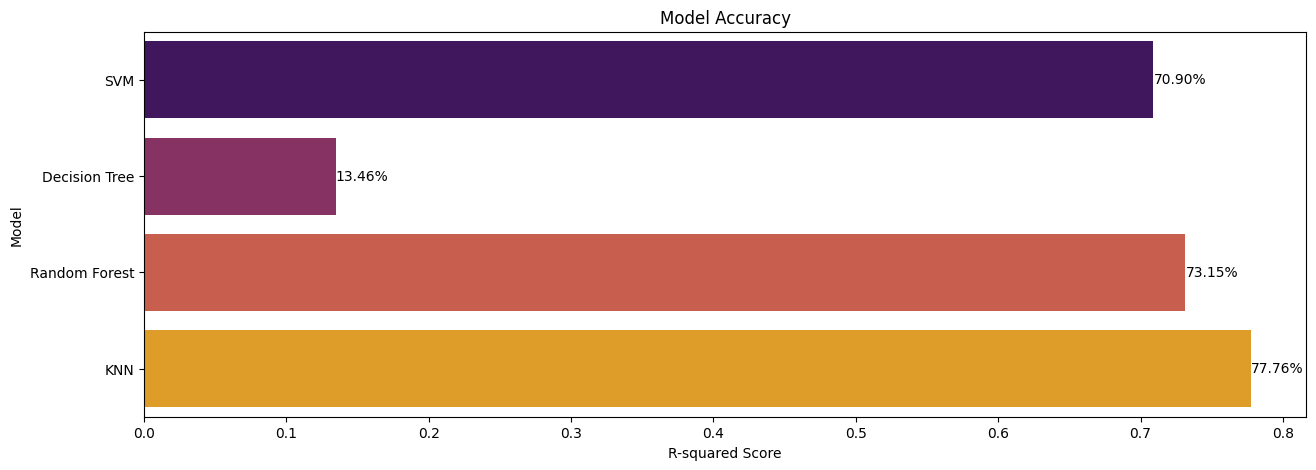

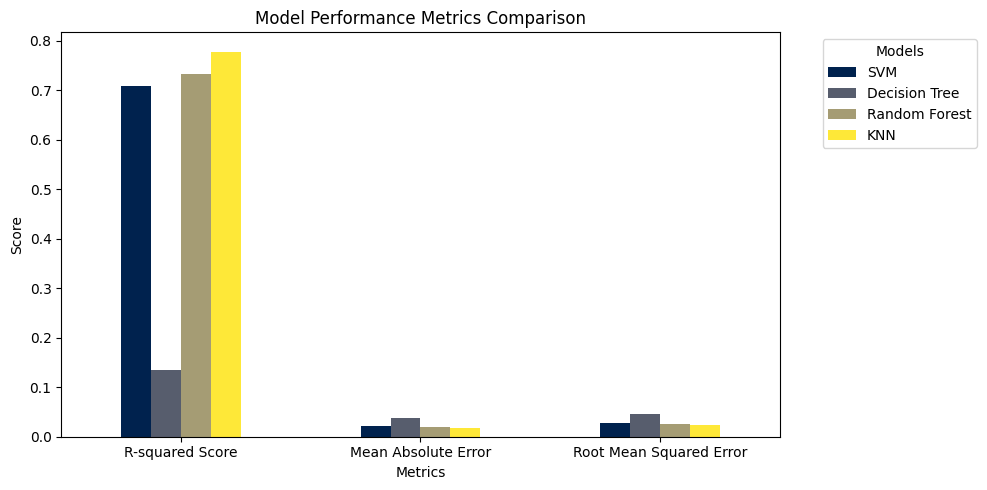

In [ ]:
models = {
    'SVM' : svm.SVR(max_iter = 1000),
    'Decision Tree' : DecisionTreeRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42, n_estimators = 100),
    'KNN' : KNeighborsRegressor(n_neighbors = 5),
}

mean_abs_errs = {}
rms_errs = {}
r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test, y_pred)
    mean_abs_errs[name] = mean_abs_err

    rms_err = root_mean_squared_error(y_test, y_pred)
    rms_errs[name] = rms_err

    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

    print(name, end = "\n")
    print(f"Mean Absolute Error: {mean_abs_err:.4f}")
    print(f"Root Mean Sqaure Error: {rms_err:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print("\n" + "-" * 50 + "\n")

plt.figure(figsize=(15, 5))
sns.barplot(x = list(r2_scores.values()), y = list(r2_scores.keys()), hue = list(r2_scores.keys()), palette = "inferno", dodge = False)
plt.ylabel('Model')
plt.xlabel('R-squared Score')
plt.title('Model Accuracy')
plt.legend([],[], frameon = False)

for i, v in enumerate(r2_scores.values()):
    plt.text(v, i, f"{v*100:.2f}%", color = "black", va = "center")

plt.show()

print()

metrics_df = pd.DataFrame({
    "R-squared Score": r2_scores,
    "Mean Absolute Error": mean_abs_errs,
    "Root Mean Squared Error": rms_errs
})

metrics_df.T.plot(kind = "bar", figsize=(10, 5), colormap = "cividis")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation = 0)
plt.legend(title = "Models", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()